<a href="https://colab.research.google.com/github/lechemrc/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Rob_LeCheminant_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

### Loading in the data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
cancer_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

df = pd.read_csv(cancer_data_url, header=None)
df.head()

# headers looked funny so I needed to try without headers, it worked

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
df.count()

0    306
1    306
2    306
3    306
dtype: int64

In [0]:
col_headers = ['age', 'yr_operation', 'pos_nodes', 'survival']

# had to pass in names so that I could keep better track of columns

In [15]:
df = pd.read_csv(cancer_data_url, header=None, names=col_headers)
print(df.shape)
df.head()

# read in the data again, this time with updated columns 
# shape matches the instances listed in UCI's database

(306, 4)


,age,yr_operation,pos_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Checking for missing values

In [16]:
df.isna().sum()

age             0
yr_operation    0
pos_nodes       0
survival        0
dtype: int64

In [19]:
# doesn't look like any NaN initially but I'm going to check unique values

print(df['age'].unique())
print(df['yr_operation'].unique())
print(df['pos_nodes'].unique())
print(df['survival'].unique())

[30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78
 83]
[64 62 65 59 58 60 66 61 67 63 69 68]
[ 1  3  0  2  4 10  9 30  7 13  6 15 21 11  5 23  8 20 52 14 19 16 12 24
 46 18 22 35 17 25 28]
[1 2]


From what I can tell, the data looks like it doesn't have any missing values or anything particularly out of place. I will continue to monitor this as I do an examination and analysis next.


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [23]:
print(df['age'].mean())
print(max(df['age']))
print(min(df['age']))
df['age'].mode()

# the average age was 52, so this could be an older set of patients, though the 
# lowest age was 30 and oldest was 83, most common age matched the mode as well

52.45751633986928
83
30


0    52
dtype: int64

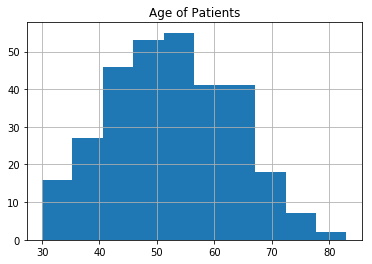

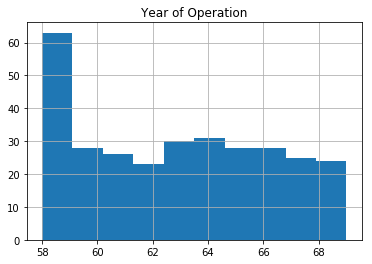

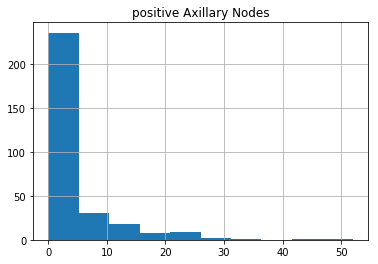

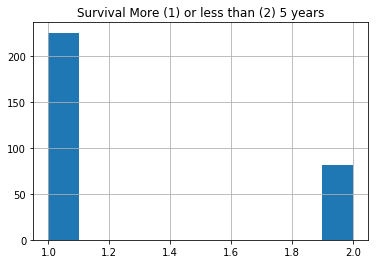

In [142]:
df['age'].hist(bins=10)
plt.title('Age of Patients')
plt.show(block=False)
df['yr_operation'].hist(bins=10)
plt.title('Year of Operation')
plt.show()
df['pos_nodes'].hist(bins=10)
plt.title('positive Axillary Nodes')
plt.show(block=False)
df['survival'].hist(bins=10)
plt.title('Survival More (1) or less than (2) 5 years')
plt.show(block=False)

# fairly standard distribution for ages, though it does show many were  between
# 40 and 55 years of age

In [50]:
age_bins = pd.cut(df['age'], 5)

pd.crosstab(age_bins, df['survival'])

survival,1,2
age,,
"(29.947, 40.6]",39,4
"(40.6, 51.2]",68,31
"(51.2, 61.8]",69,27
"(61.8, 72.4]",43,16
"(72.4, 83.0]",6,3


What the above crosstab is showing me is that survival longer than 5 years was the norm among the groups, 1 meaning longer than 5 years and 2 meaning less than 5 years of living post-surgery. 

In [113]:
node_bins = pd.cut(df['pos_nodes'], 5)
pd.crosstab(node_bins, df['survival'])

survival,1,2
pos_nodes,,
"(-0.052, 10.4]",208,58
"(10.4, 20.8]",11,15
"(20.8, 31.2]",5,6
"(31.2, 41.6]",0,1
"(41.6, 52.0]",1,1


In [114]:
print('Only ' + str(round(58 / (208 + 58), 2) * 100) + '% of patients die in < 5 years with 10 nodes or less')
print(str(round(23 / (40), 2) * 100) + '% of patients die in < 5 years with more than 10 nodes')

Only 22.0% of patients die in < 5 years with 10 nodes or less
56.99999999999999% of patients die in < 5 years with more than 10 nodes


This above crosstab is really interesting. It's showing a pretty strong contrast that suggest that if you have under 10 positive nodes, you are much more likely to survive (compare the 208 living more than 5 years to the 58 living less than 5). After that it becomes much less so with survival less than half the time, and even less in higher numbers. 

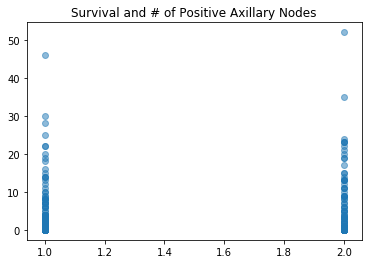

In [115]:
plt.scatter(df['survival'], df['pos_nodes'], alpha=0.5)
plt.title('Survival and # of Positive Axillary Nodes')
plt.show()

# This graph doesn't show me much good data

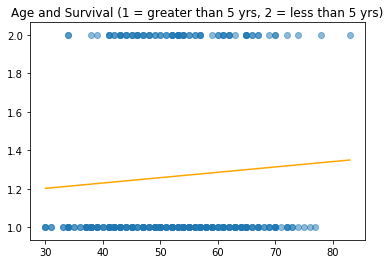

In [125]:
plt.scatter(df['age'], df['survival'], alpha='0.5')
plt.plot(np.unique(df['age']), np.poly1d(np.polyfit(df['age'], df['survival'], 1))(np.unique(df['age'])), color='orange')
plt.title('Age and Survival (1 = greater than 5 yrs, 2 = less than 5 yrs)')
plt.show()

# I wanted to add a line of best fit code to show the slight skew upward, meaning
# that the data shows that the older you get, you have a slightly less chance 
# of survival 

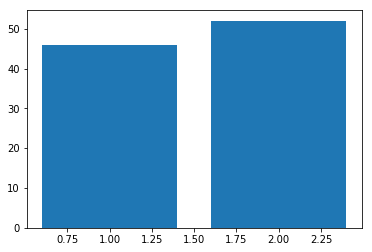

In [136]:
plt.bar(df['survival'], df['pos_nodes'])
plt.show()

# This really isn't showing me much, so I'm going to try and find better ways of 
# displaying the data. What it does suggest is that more positive nodes might
# worsen outcomes, which makes sense... more positive nodes means more cancer
# spread to lymph nodes

In [91]:
print(df['pos_nodes'].value_counts())

# pos_nodes = df['pos_nodes'].value_counts().index.tolist()
# print(pos_nodes)

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: pos_nodes, dtype: int64


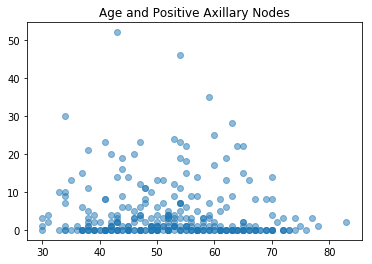

In [135]:
plt.scatter(df['age'], df['pos_nodes'], alpha=0.5)
plt.title('Age and Positive Axillary Nodes')
plt.show()

# This shows a pretty spurious relationship in the data.
# The positive nodes is a confounding variable in terms of age

In [143]:
year_bins = pd.cut(df['yr_operation'], 5)
pd.crosstab(year_bins, df['survival'])

survival,1,2
yr_operation,,
"(57.989, 60.2]",66,25
"(60.2, 62.4]",39,10
"(62.4, 64.6]",45,16
"(64.6, 66.8]",37,19
"(66.8, 69.0]",38,11


In [163]:
a = 66/(66+25) * 100
print(a)
b = 39/(39+10) * 100
print(b)
c= 45/(45+16) * 100
print(c)
d= 37/(37+19) * 100
print(d)
e= 38/(38+11) * 100
print(e)

avg = (a+b+c+d+e)/5
print(str(round(avg, 2)) + '%')

72.52747252747253
79.59183673469387
73.77049180327869
66.07142857142857
77.55102040816327
73.9%


In [167]:
avg_list = [a, b, c, d, e]
print(avg_list)

[72.52747252747253, 79.59183673469387, 73.77049180327869, 66.07142857142857, 77.55102040816327]


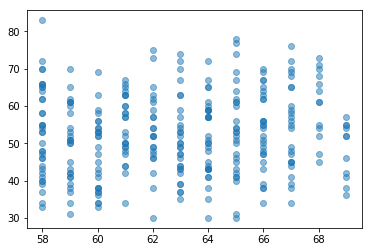

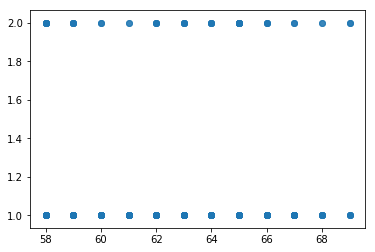

In [178]:
plt.scatter(df['yr_operation'], df['age'], alpha=0.5)
plt.show(block=False)
plt.scatter(df['yr_operation'], df['survival'], alpha=0.5)
plt.show()

These don't seem to show any correlation at all. Age is fairly across the board and the average survival past 5 years percentage is rougly the same from year to year. 

In [183]:
pd.crosstab(age_bins, [df['survival'], df['pos_nodes']])

survival         1                              ...  2                           
pos_nodes       0   1  2  3  4  5  6  7  8  9   ... 15 17 19 20 21 22 23 24 35 52
age                                             ...                              
(29.947, 40.6]  17   5  4  2  2  1  1  1  0  0  ...  0  0  0  0  1  0  0  0  0  0
(40.6, 51.2]    30  13  5  4  5  0  2  1  3  0  ...  0  0  1  1  0  0  2  0  0  1
(51.2, 61.8]    34  12  4  5  3  1  0  3  1  1  ...  1  1  0  0  0  0  1  1  1  0
(61.8, 72.4]    32   2  2  1  0  0  1  0  1  1  ...  1  0  1  0  0  1  0  0  0  0
(72.4, 83.0]     4   1  0  1  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0

[5 rows x 50 columns]

This one is hard to read as well, but there could be some interesting data to gleam from this. 

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

### Answers


**What is at least one feature that looks to have a positive relationship with survival?**

- The younger you are, the more likely you are to survive, the older the less likely. It's a slight skew in that direction, but it's a positive relationship nonetheless

**What is at least one feature that looks to have a negative relationship with survival?**

- It seems that if there are less than 10 positive axillary nodes, you are much more likely to survive, a percentage of 78% of the time. More than 10 gives a roughly ~43% chance of survival... so: More Nodes, Less Survival

**How are those two features related with each other, and what might that mean?**

Survival was the biggest variable with relations to other things. Age and surival was positive relationship and positive axillary nodes and survival was a negative relationship. The younger you are, the more likely you are to survive, though age doesn't seem to affect the number of nodes. Also, the more nodes you have, the less likely you are to survive. It is directly describing the spread of cancer and the wider the spread the less likely the positive outcome. Year of operation seemed to be a confounding variable not really contributing much to the different statistical relationships at all. 